# **Soft margin SVM**

**1.Problem**

Linear separability is ideal in practice.

a)Data are often noisy or erronous

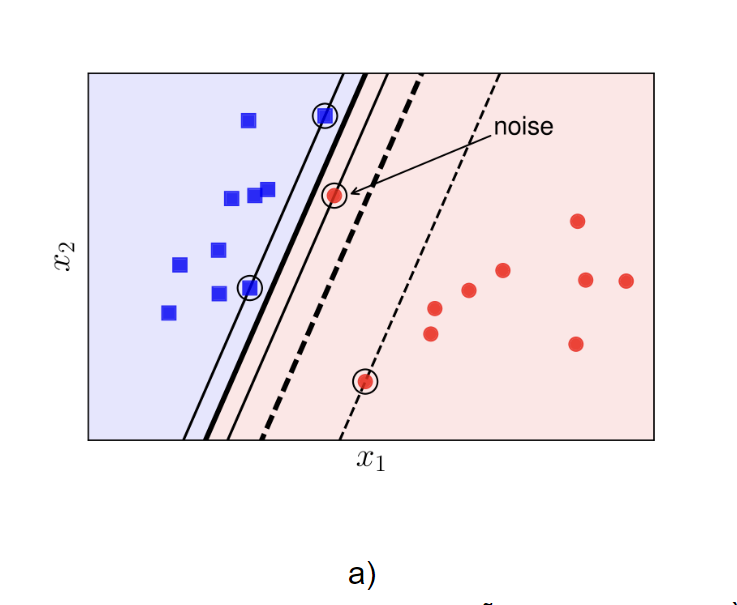

b)Two classes overlapping

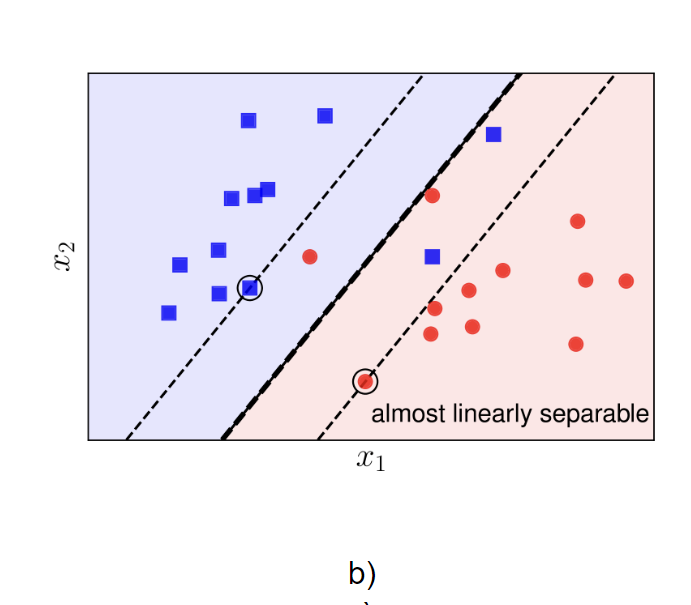

**2.Mathematical analysis**

Hard Margin SVM

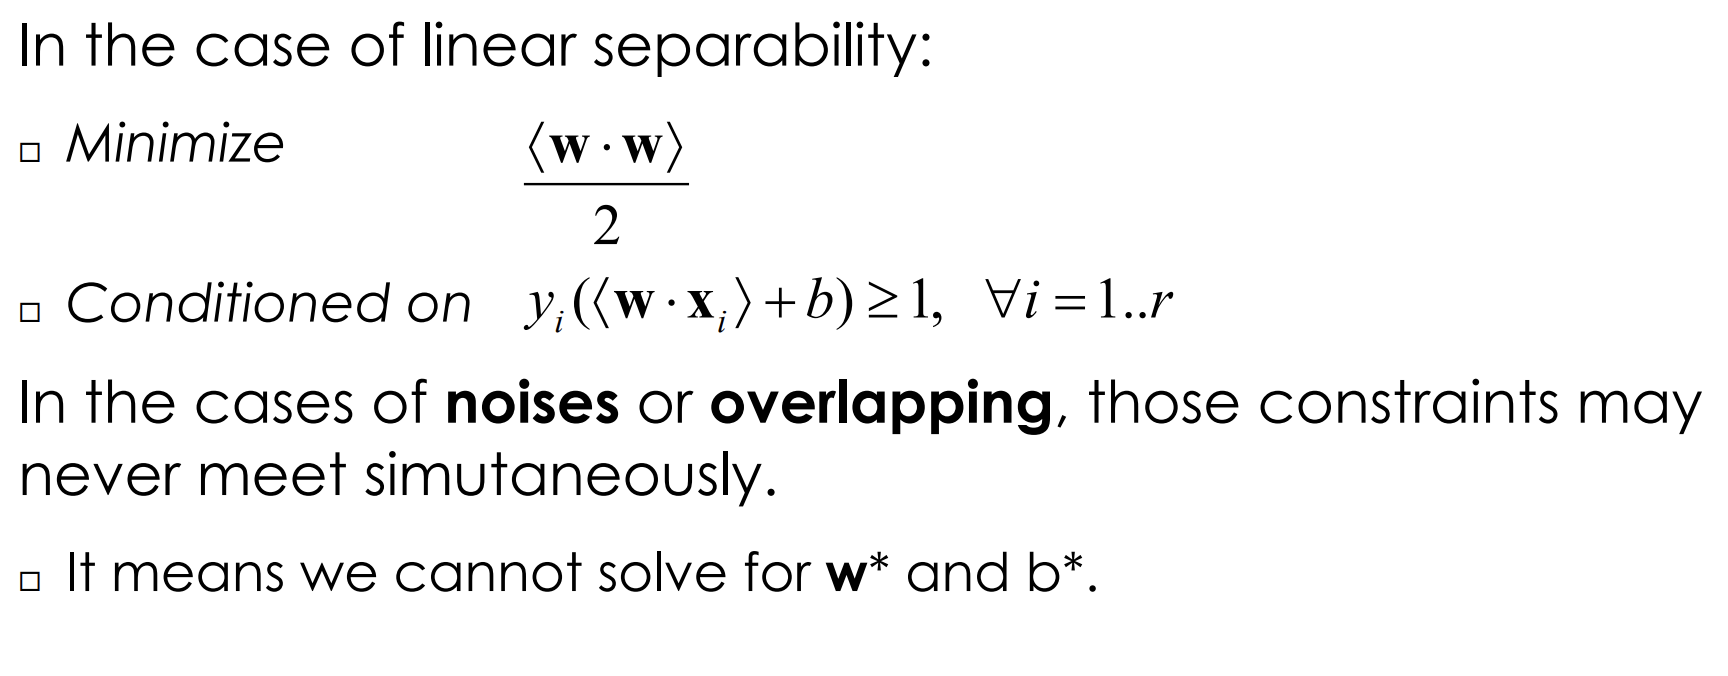

**Relaxing the constraints**

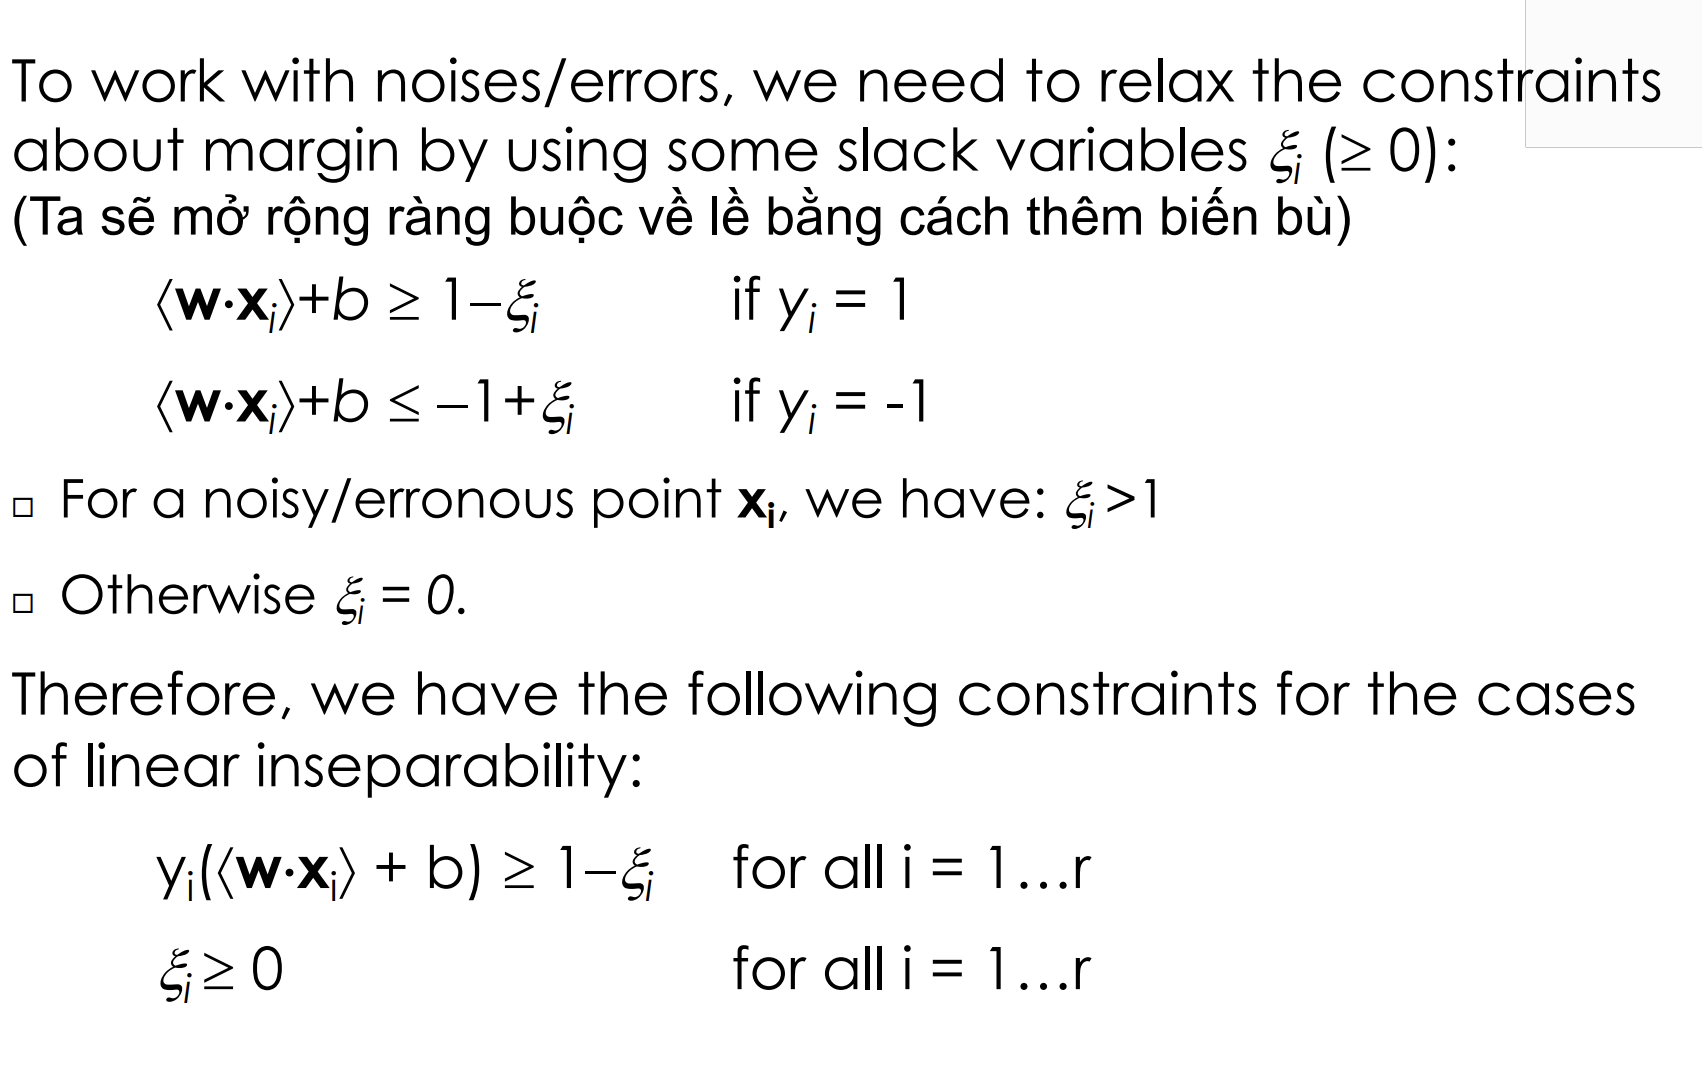

**Penalty on noises/errors**

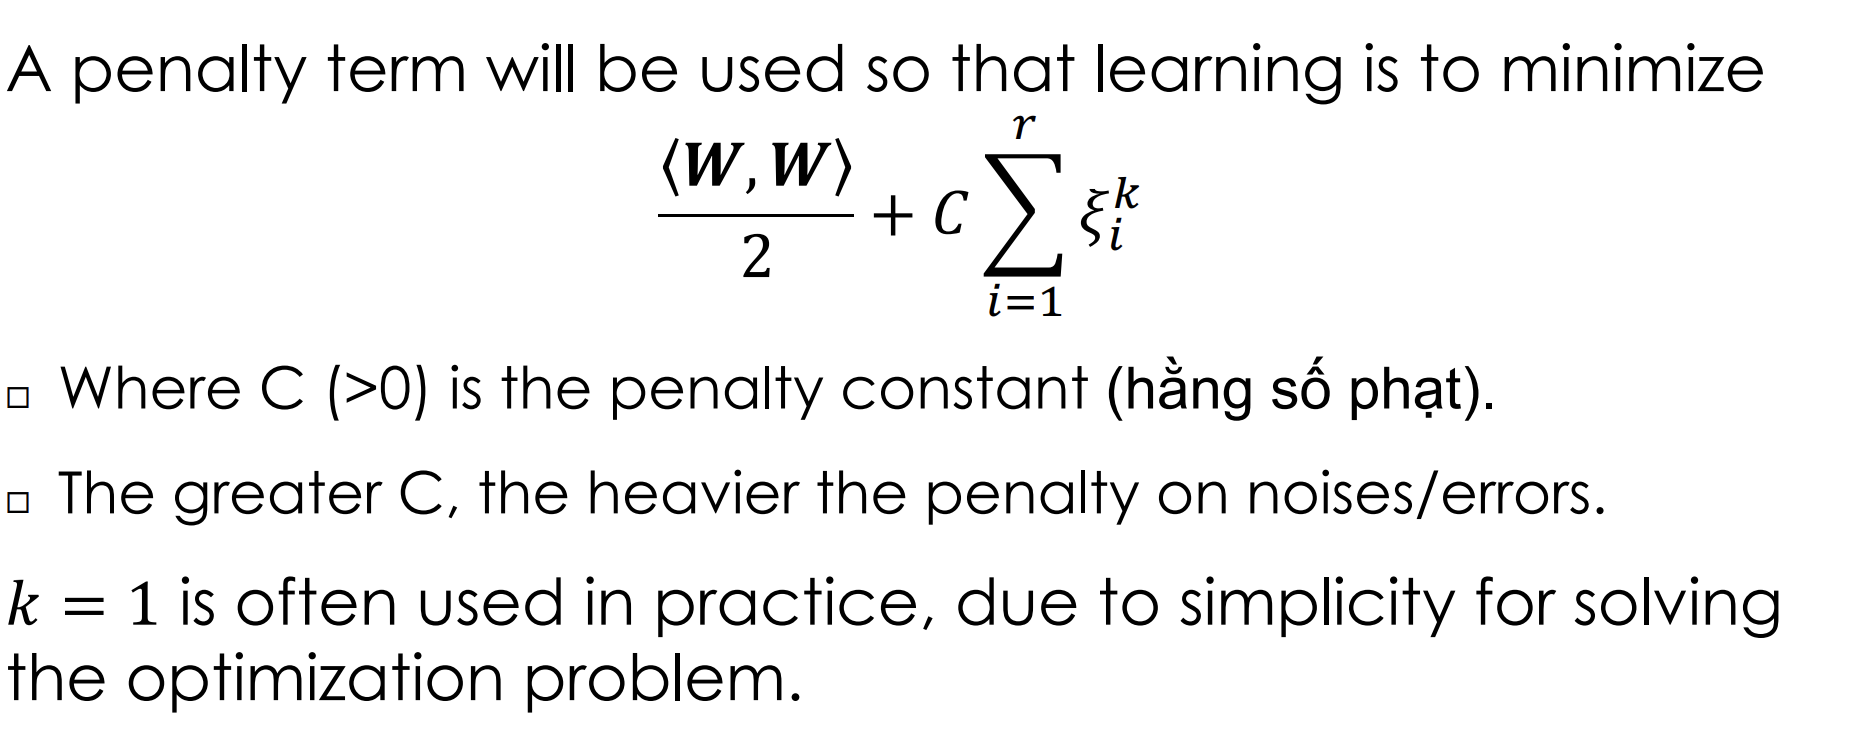

The new optimization problem

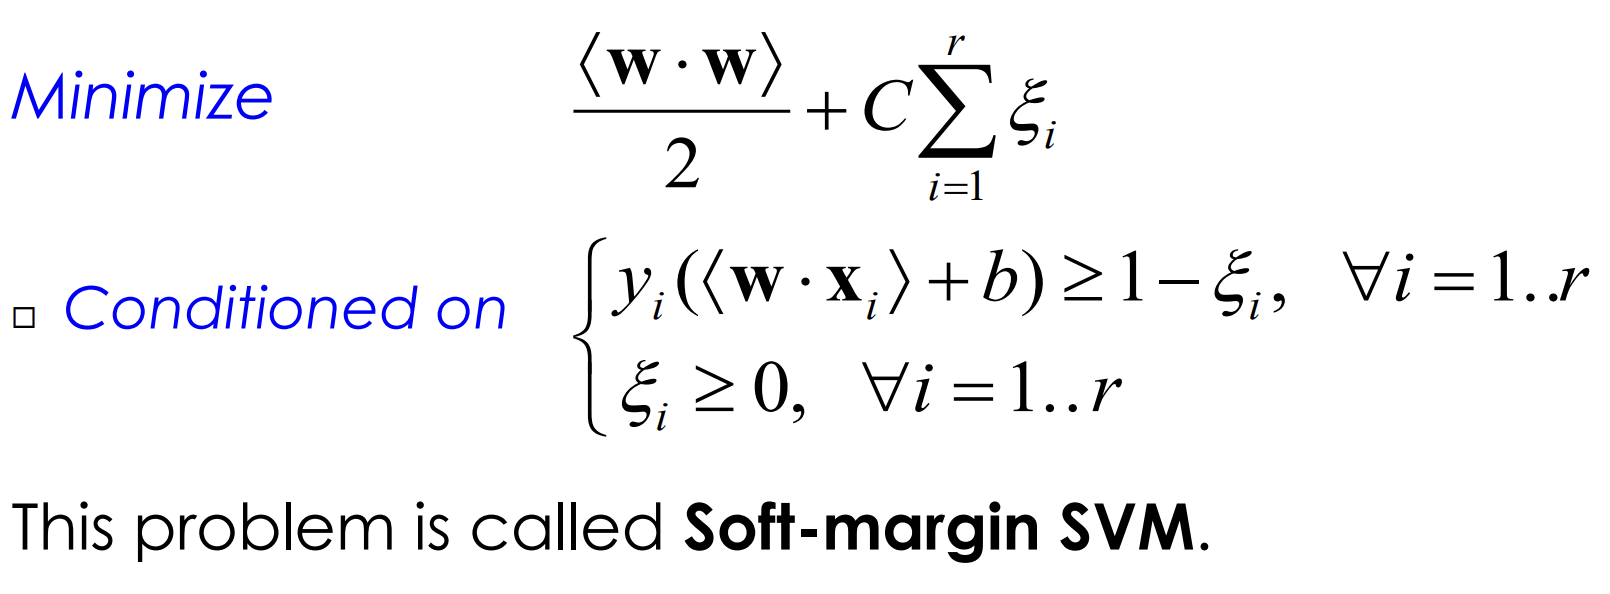

**Lagrangian for the Soft-margin SVM**

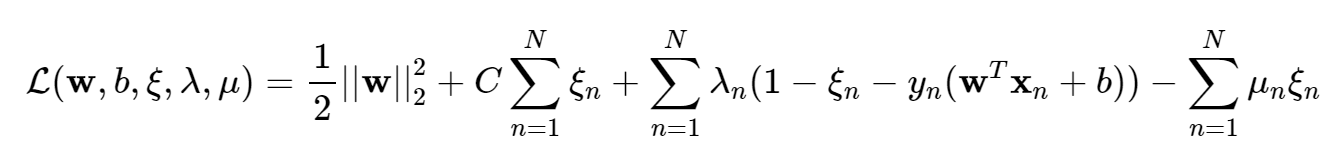

Solution:

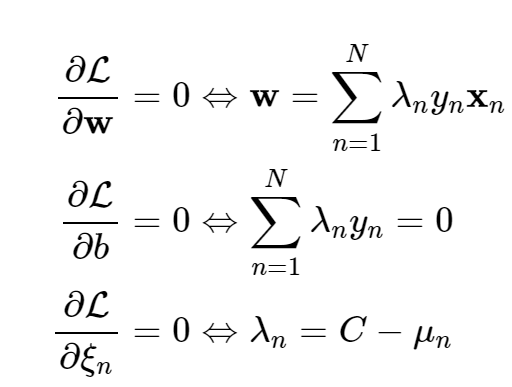

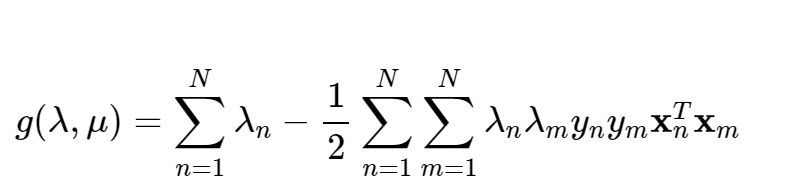

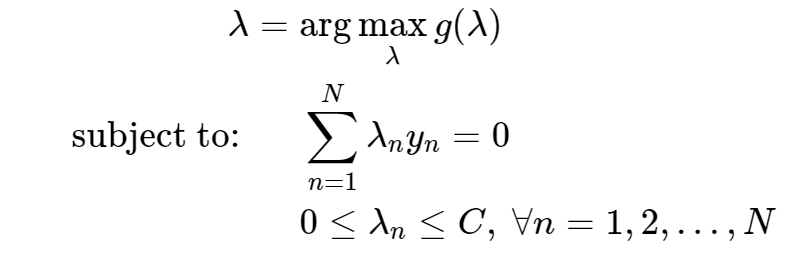

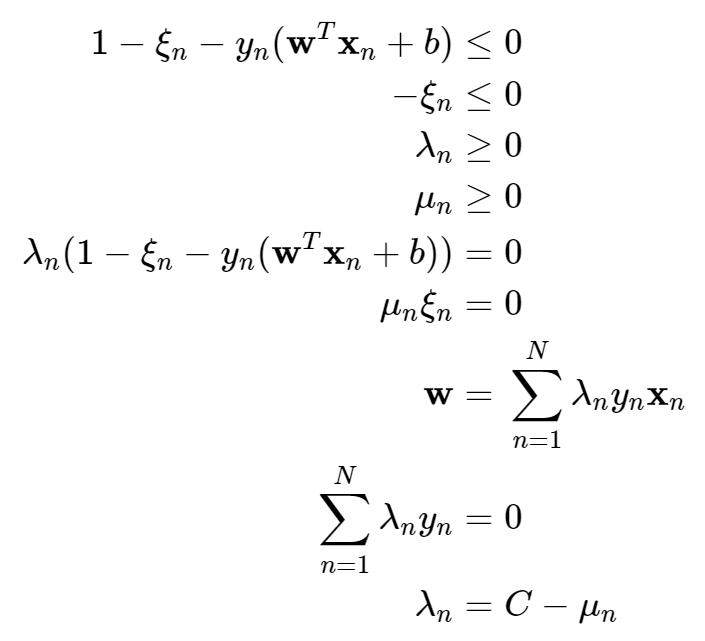

Result:

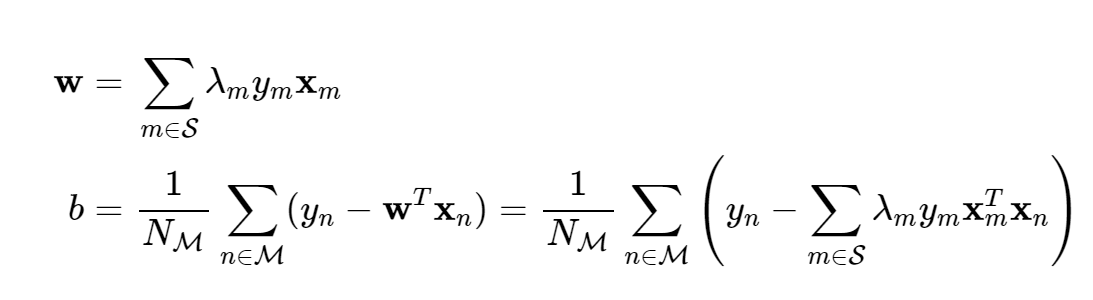

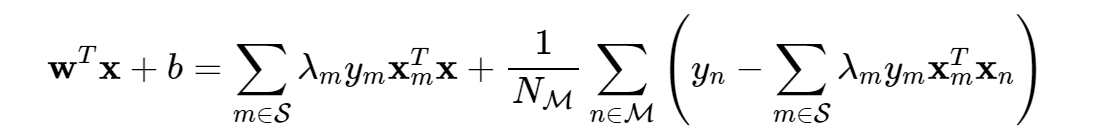

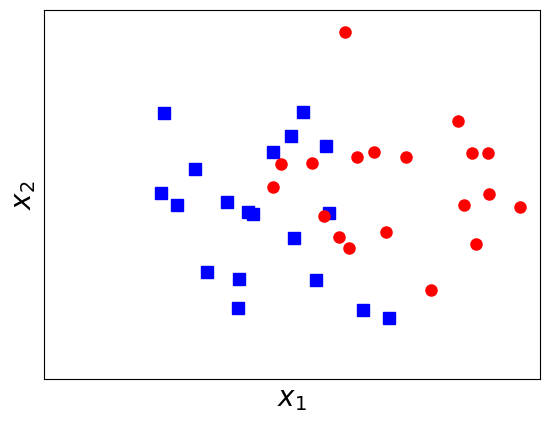

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20 # number of samplers per class
X0 = np.random.multivariate_normal(means[0], cov, N) # each row is a data point
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1))
y = np.concatenate((np.ones(N), -np.ones(N)))
with PdfPages('data.pdf') as pdf:
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
    plt.axis('equal')
    plt.ylim(0, 4)
    plt.xlim(0, 5)

    # hide tikcs
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    pdf.savefig()
    plt.show()

In [ ]:
from sklearn.svm import SVC
C = 100
clf = SVC(kernel = 'linear', C = C)
clf.fit(X, y)
w_sklearn = clf.coef_.reshape(-1, 1)
b_sklearn = clf.intercept_[0]
print(w_sklearn.T, b_sklearn)


[[-1.87461946 -1.80697358]] 8.496911901960104


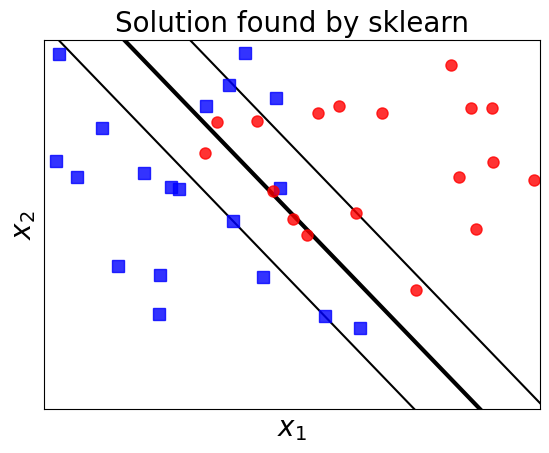

In [ ]:
def myplot(X0, X1, w, b, filename, tit):
    with PdfPages(filename) as pdf:
        fig, ax = plt.subplots()
        w0 = w[0]
        w1 = w[1]
        x1 = np.arange(-10, 10, 0.1)
        y1 = -w0/w1*x1 - b/w1
        y2 = -w0/w1*x1 - (b-1)/w1
        y3 = -w0/w1*x1 - (b+1)/w1
        plt.plot(x1, y1, 'k', linewidth = 3)
        plt.plot(x1, y2, 'k')
        plt.plot(x1, y3, 'k')

        # equal axis and lim
        plt.axis('equal')
        plt.ylim(0, 3)
        plt.xlim(2, 4)

        # hide tikcs
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        # fill two regions
        y4 = 10*x1
        plt.plot(x1, y1, 'k')

        plt.xlabel('$x_1$', fontsize = 20)
        plt.ylabel('$x_2$', fontsize = 20)
        plt.title('Solution found by ' + tit, fontsize = 20)

        plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
        plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
        pdf.savefig()
        plt.show()

myplot(X0, X1, w_sklearn, b_sklearn, 'data.pdf', 'sklearn')

# **Kernel Support Vector Machine(Non-linear SVM)**

Data are not linearly separable.

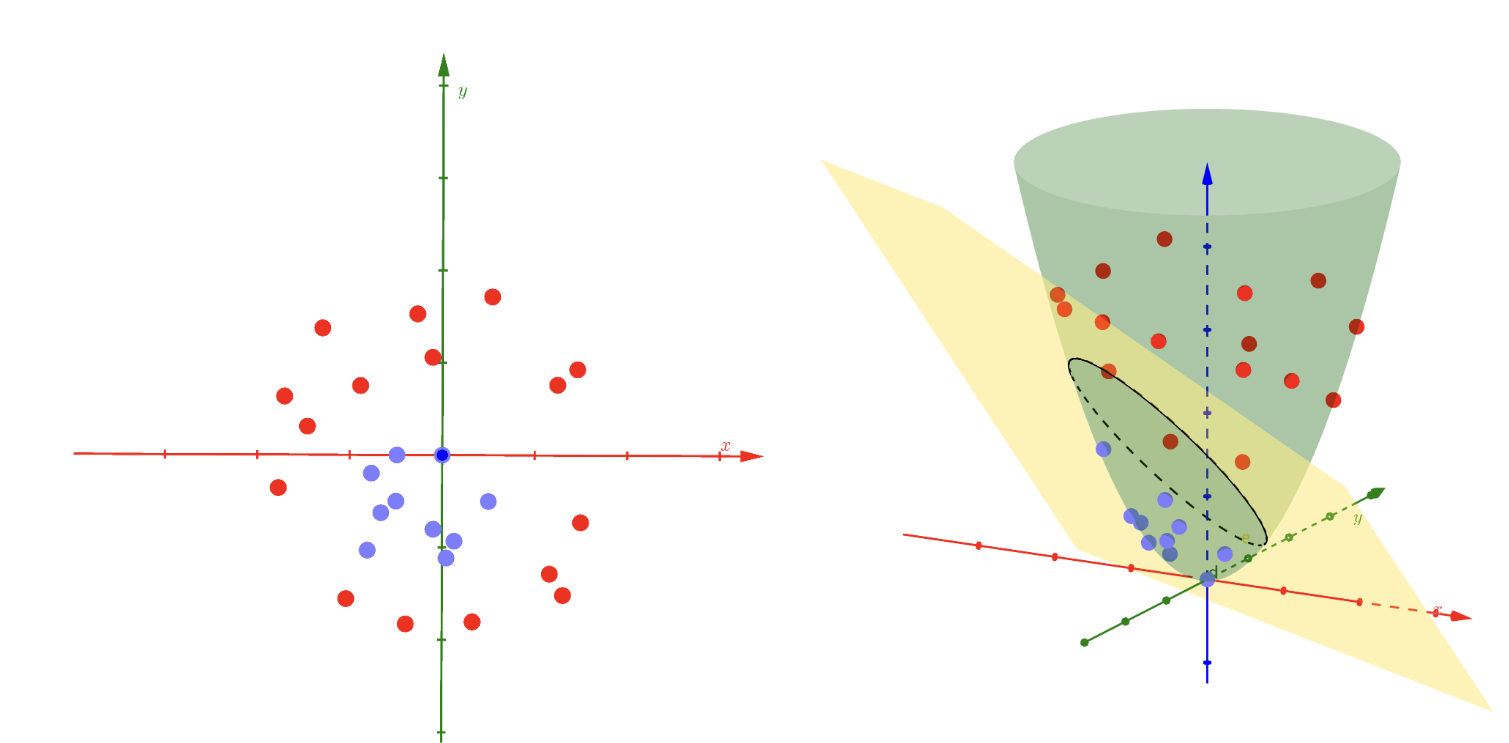

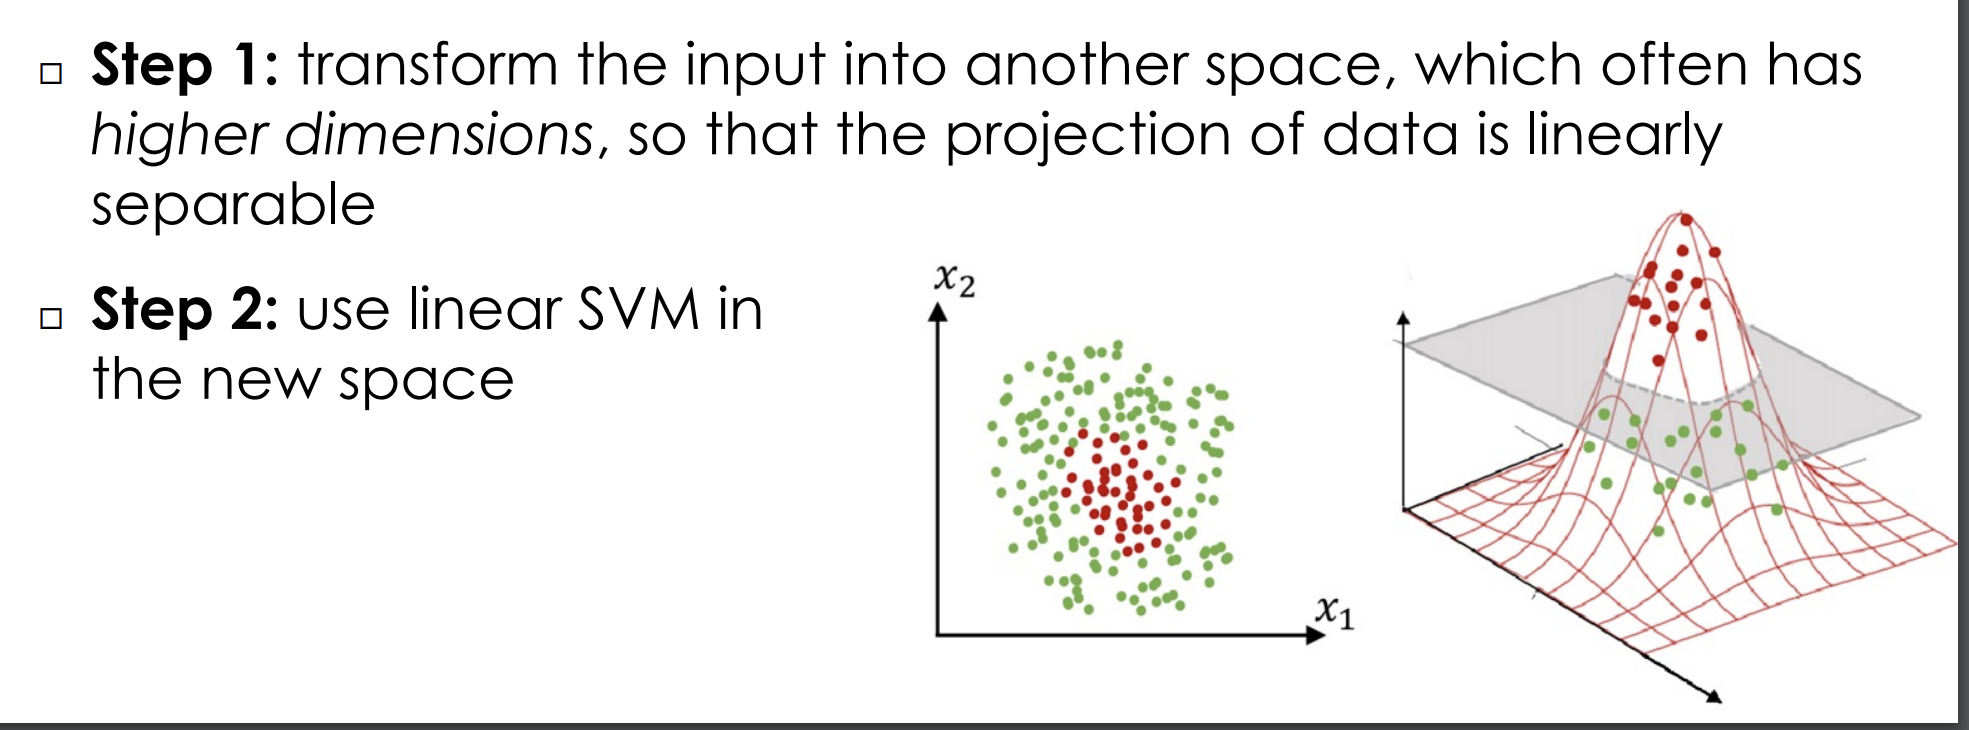

Input space: initial representation of data

Feature space: the new space after the transformation

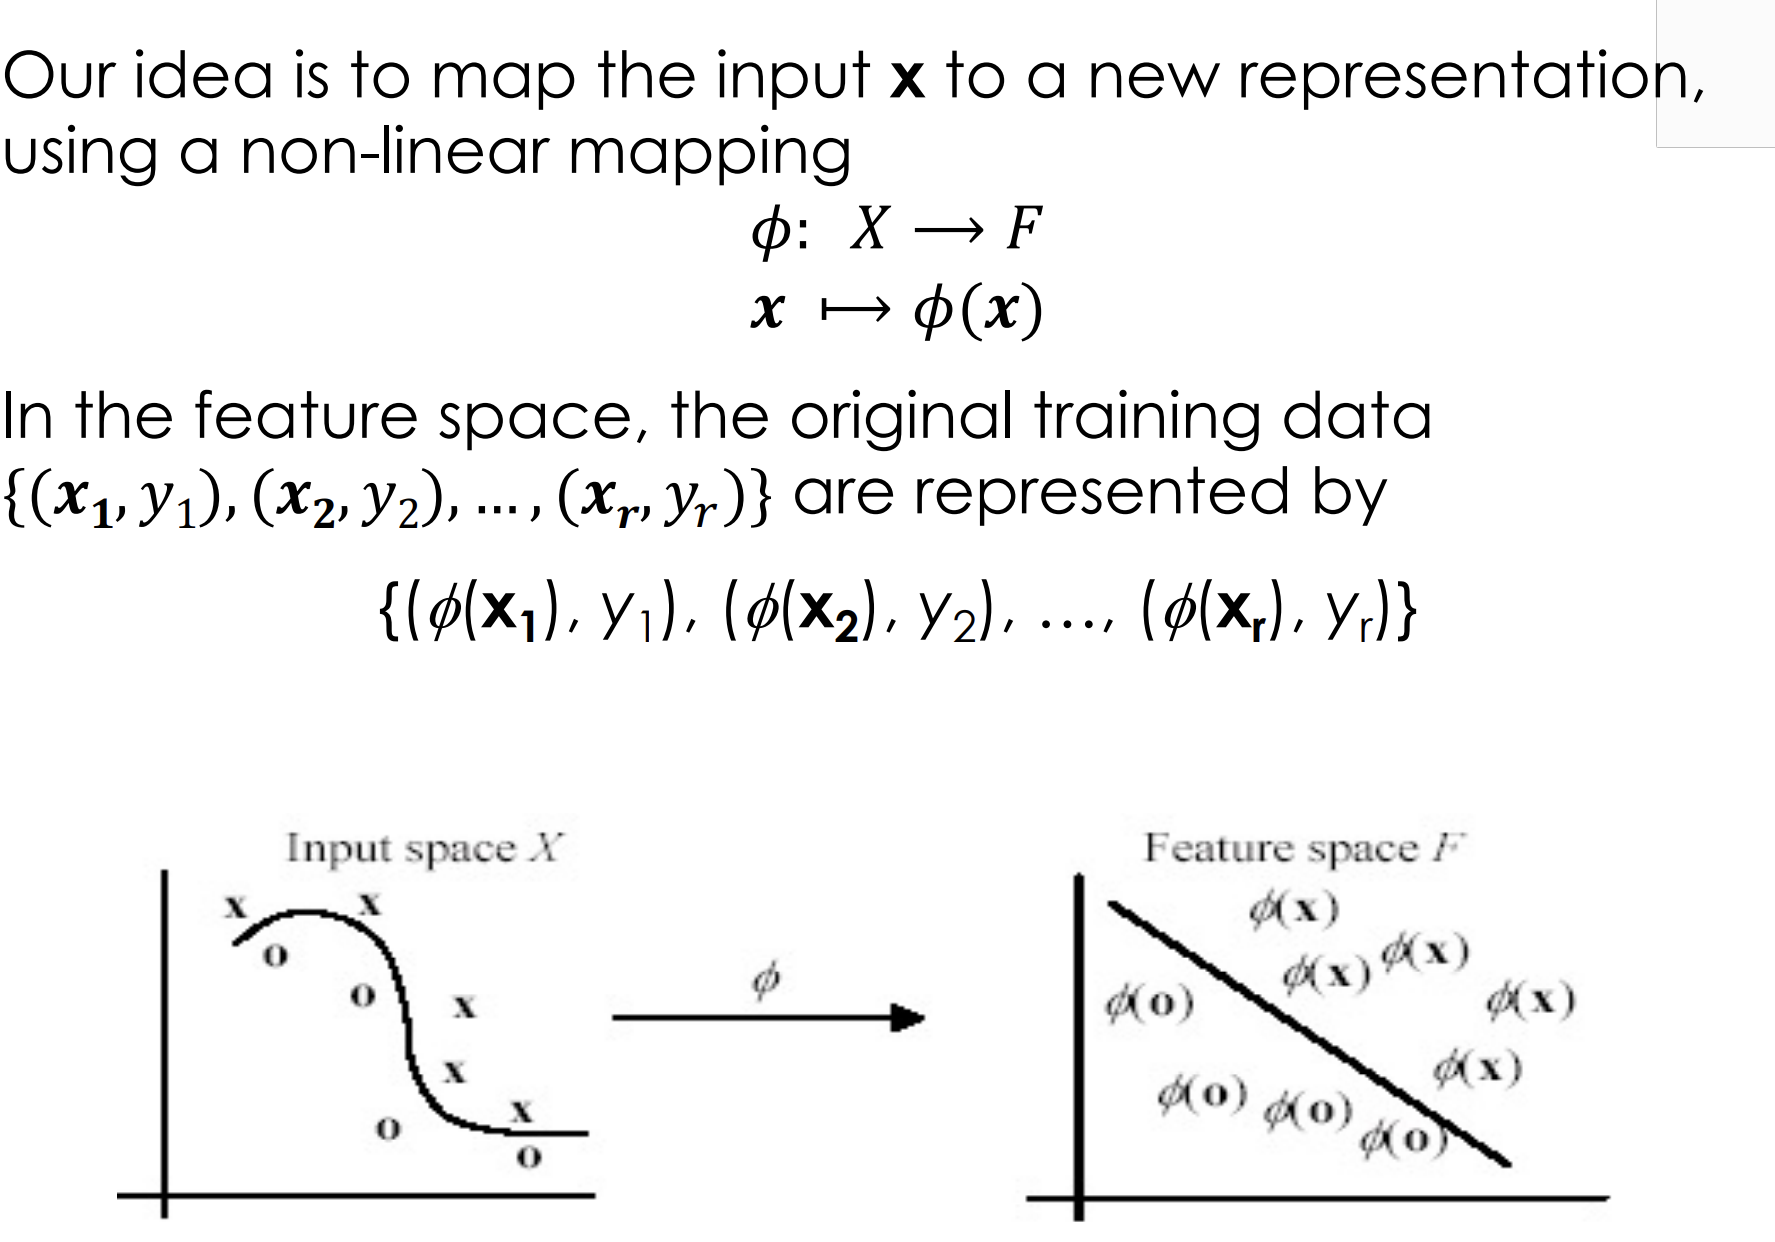

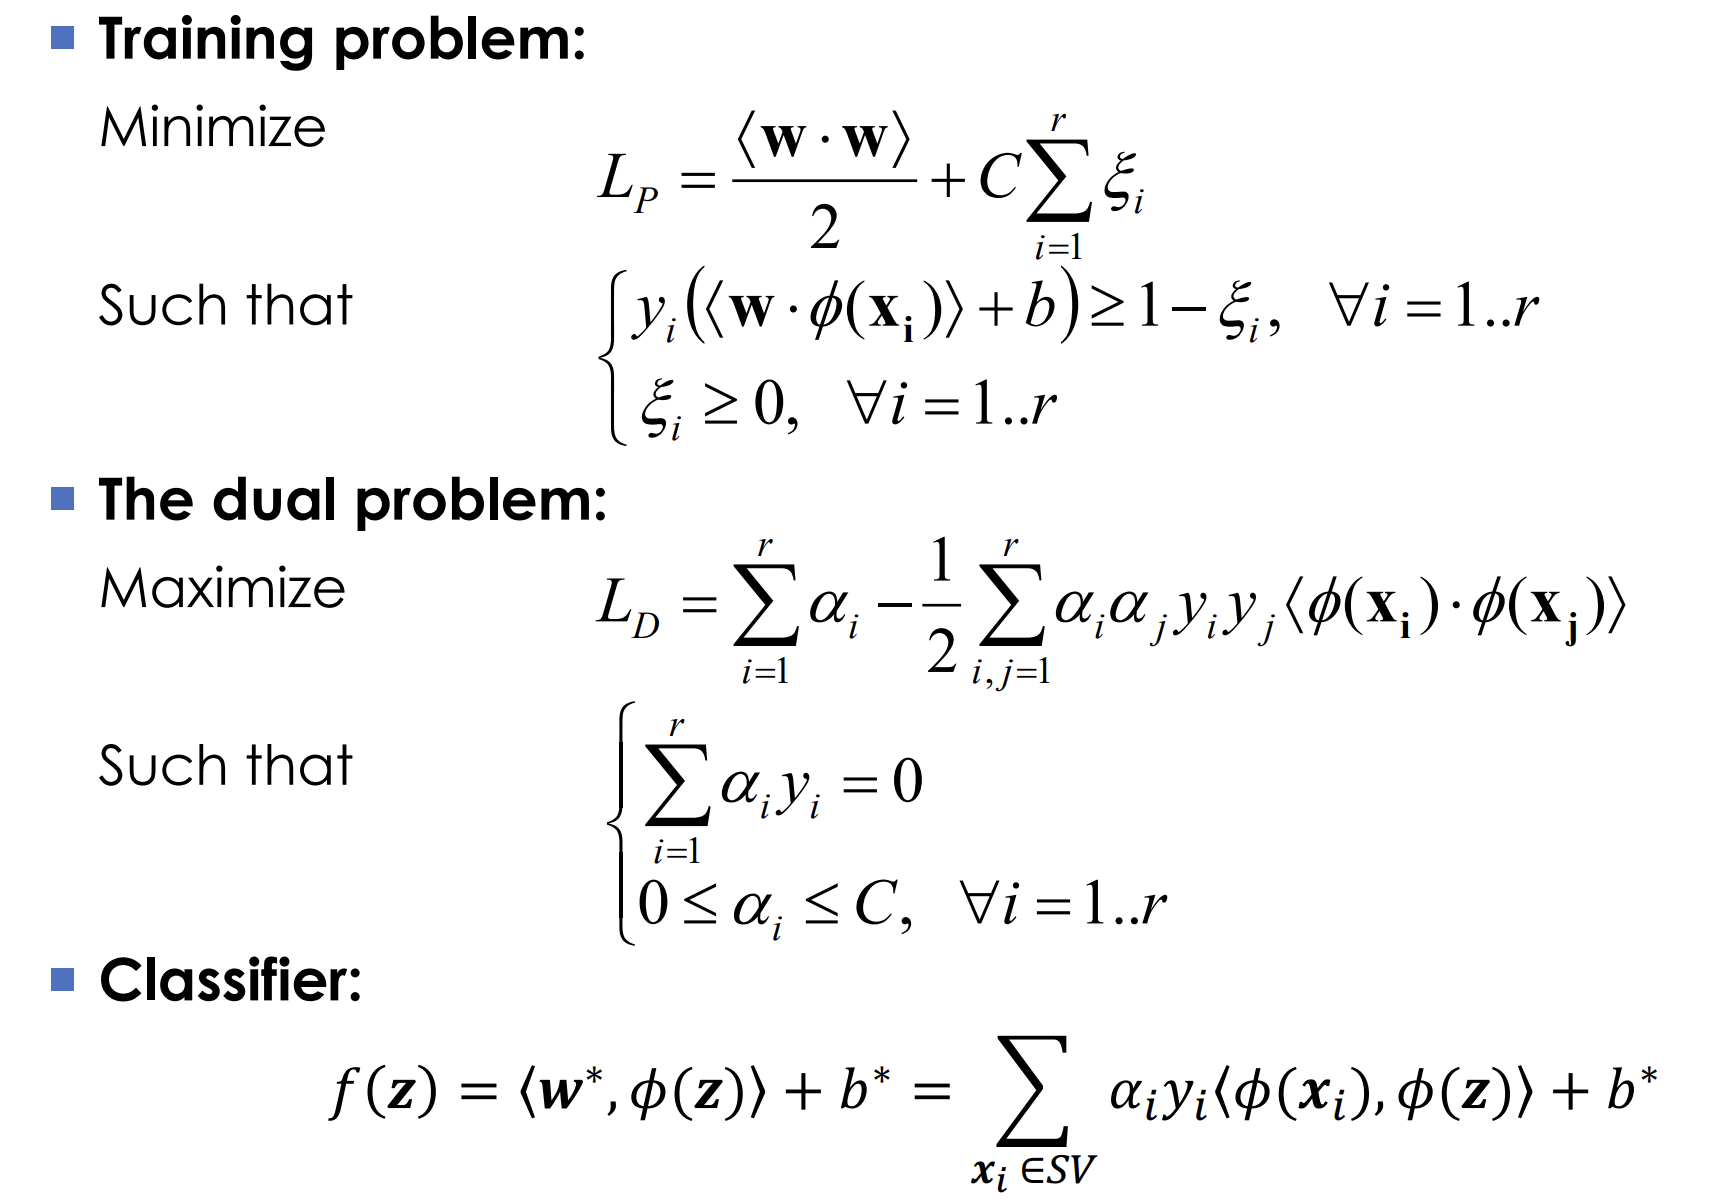

Kernel trick: Nonlinear SVM can be used by replacing those inner products by evaluations of some kernel function


# **kernel function**

k(x,z)=k(z,x)

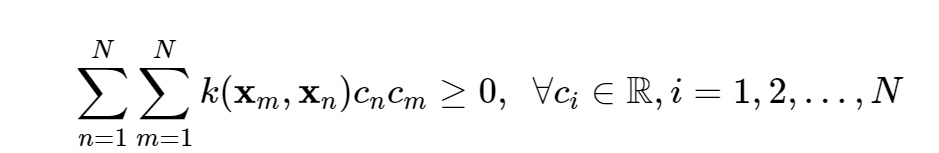

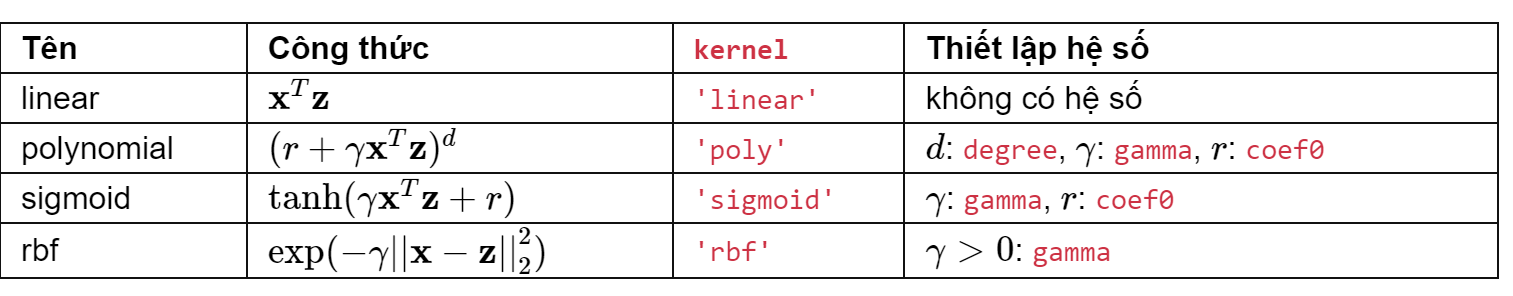

-Linear Kernel:

Used when the data can be well separated by a linear boundary.

Suitable for problems where predictions are based on linear features.

-Polynomial Kernel:

Used when there is uncertainty about the linearity of the data but unsure about the degree of the polynomial to use.

It is necessary to adjust the polynomial degree and the coefficient (coef0) to observe their impact on performance.

-RBF (Gaussian) Kernel:

Appropriate when the shape of the decision boundary is unknown.

RBF is often a default and effective choice in many situations.

Adjust the gamma parameter to control the width of the Gaussian function.

-Sigmoid Kernel:

Used when dealing with data that does not have an elliptical shape.

It is necessary to adjust the coef0 parameter to control the shape of the sigmoid.

# **Code**

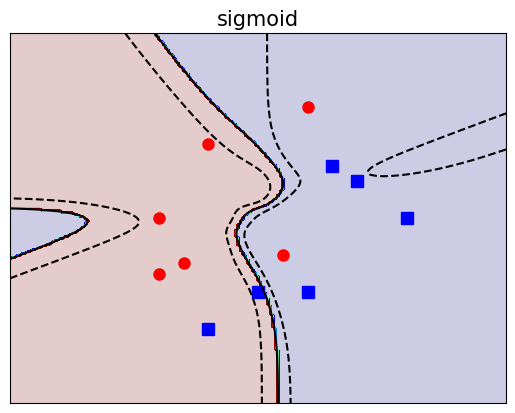

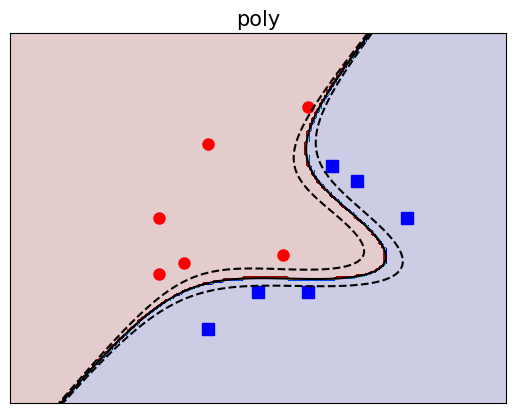

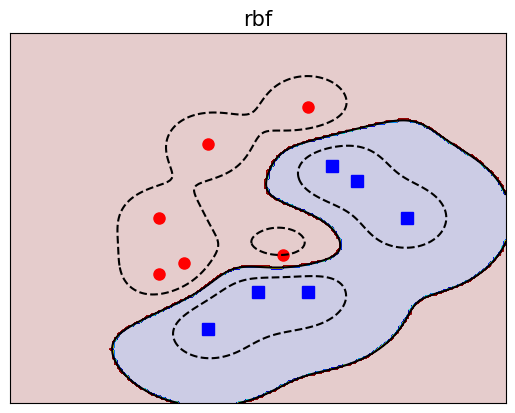

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# XOR dataset and targets
X = np.c_[(-1, -3),
          (0, -2),
          (1, -2),
          (2, 1),
          (3, 0),
          (1.5, 1.4),
          #---
          (1, 3),
          (0.5, -1),
          (-1, 2),
          (-2, -1.5),
          (-2, 0),
          (-1.5, -1.2)].T
N = 6
Y = [0] * N + [1] * N
fignum = 1

# fit the model
for kernel in ('sigmoid', 'poly', 'rbf'):
        clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
        clf.fit(X, Y)
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='None')
        plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8)
        plt.plot(X[N:, 0], X[N:, 1], 'ro', markersize = 8)

        plt.axis('tight')
        x_min = -5
        x_max = 5
        y_min = -5
        y_max = 5

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1

plt.show()